In [35]:
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stoer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
with open('C:\\Users\\stoer\\OneDrive\\Desktop\\G20.txt', 'r',encoding='utf-8') as file:
    text = file.read()

In [38]:
# Remove punctuation and split into words
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator)
words = cleaned_text.split()

In [54]:
# Remove stop words, including custom conjunctions
stop_words = set(stopwords.words('english'))
custom_conjunctions = set(["and", "but", "or", "g20", "global", "international", "welcome", "also", 'including', 'support', 'towards', 'well',
 'call', 'look', 'forward', "countries"])  # Add your custom conjunctions here
stop_words.update(custom_conjunctions)

words = [word for word in words if word.lower() not in stop_words]

In [55]:
#Define a regular expression pattern to match numbers and Roman numerals
pattern = r'\b(?:[0-9]+|i{1,8}|v|x|l|c|d|m)+\b'
# This pattern matches numbers (e.g., 1, 2, 3), Roman numerals (e.g., i, ii, iii), and lowercase versions (e.g., I, II, III)

# Filter out words matching the pattern
words = [word for word in words if not re.match(pattern, word, re.IGNORECASE)]

In [56]:
# Filter out words matching the pattern
words = [word for word in words if not re.match(pattern, word, re.IGNORECASE)]

word_count = {}
for word in words:
    word = word.lower()  # Convert to lowercase to treat words like "Word" and "word" as the same
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

# Replace the previous word_count dictionary with a Counter object
word_count = Counter(words)

# Get the top 100 words based on their frequencies
top_n_words = word_count.most_common(150)

# Create a dictionary from the top 100 words
top_100_word_dict = dict(top_n_words)

# Create the word cloud from the top 100 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_word_dict)

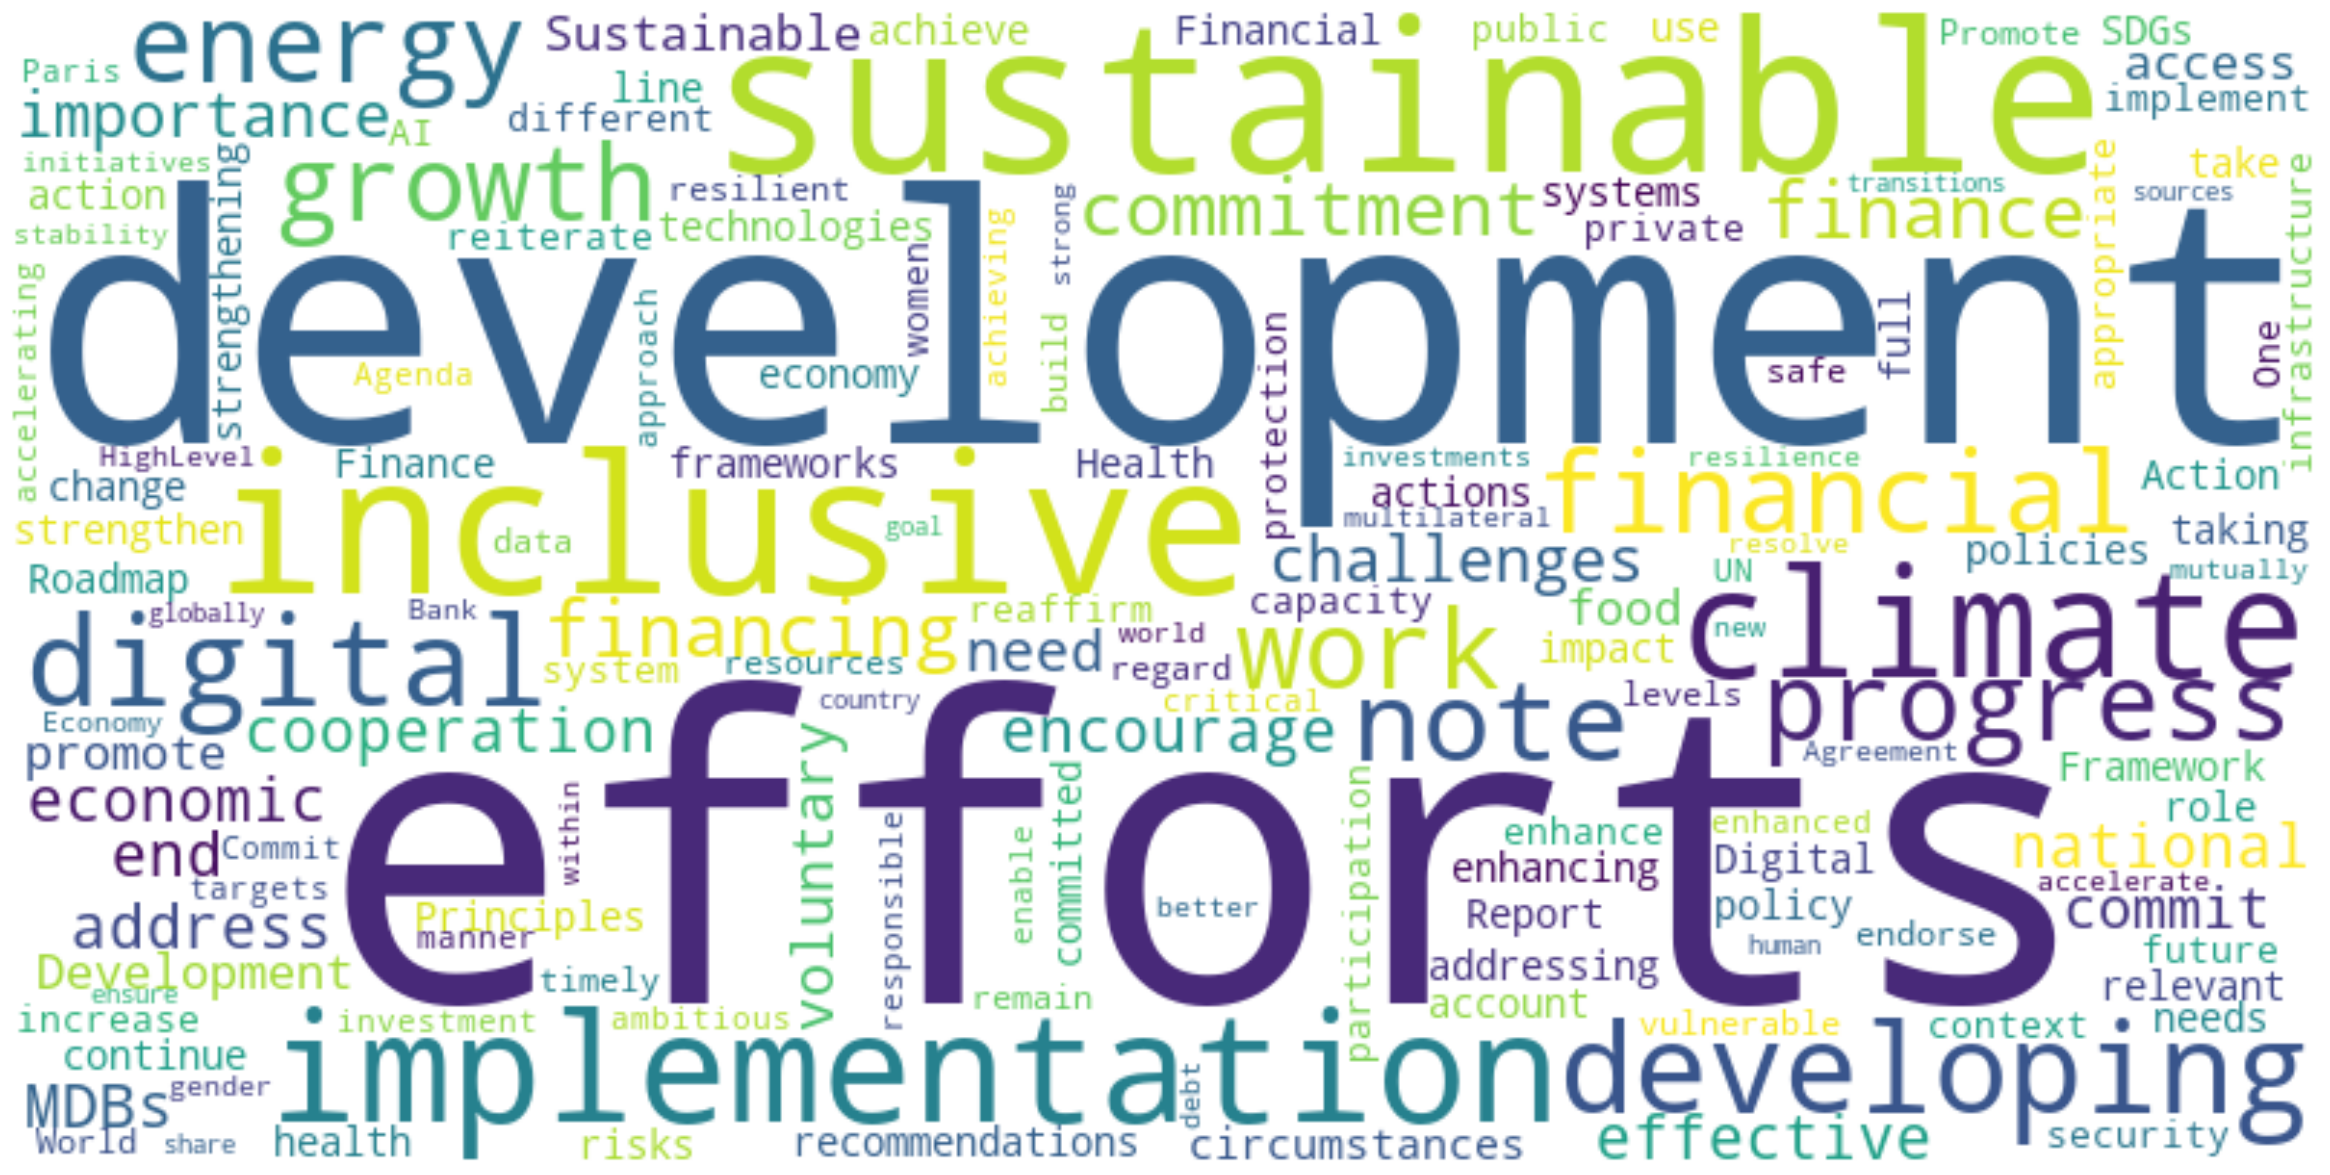

In [59]:
plt.figure(figsize=(100, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()